In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import json
import networkx as nx
import seaborn as sns
import re
from operator import itemgetter
import matplotlib.cm as mcm
import community
from community import community_louvain as cm
import leidenalg as la
import igraph as ig
from cdlib import algorithms
warnings.filterwarnings('ignore')
path = "C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/network/"
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Functions](#func)

- [Network Community 1](#comm_1)

    - [Info](#info_1)
    - [Louvain](#louvain_1)    


- [Network Community 2](#comm_2)

    - [Info](#info_2)
    - [Louvain](#louvain_2)  


- [Network Community 5](#comm_5)

    - [Info](#info_5)
    - [Louvain](#louvain_5)


- [Network Community 19](#comm_19)

    - [Info](#info_19)
    - [Louvain](#louvain_19)    

### Functions
<a id ="func"/>

In [3]:
def clean_data_format(df: pd.DataFrame, broken_col='name', fix_encoding=False):
    col = df.columns[-1]

    def clean(target):
        return str(target).replace("\r", "")

    if "\r" in col:
        clean_col = clean(col)
        df = df.rename(columns={col: clean_col})
        if df[clean_col].dtype.name == 'object':
            df[clean_col] = df[clean_col].apply(clean)
    if fix_encoding:
        df[broken_col] = df[broken_col].apply(util.fix_encoding)
    return df

In [4]:
def network_general(df, col_1="name", col_2="rt_name"):
    retweets_graph = nx.from_pandas_edgelist(df, col_1 ,col_2 , create_using=nx.DiGraph())
    info = nx.info(retweets_graph)
    
    degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
    sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
    sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
    
    return {"info": info, "degree": sorted_degree, "in_degree": sorted_in_degree,  
            "out_degree": sorted_out_degree}

In [5]:
def network_louvain(df, col_1="name", col_2="rt_name"):
    retweets_graph_und = nx.from_pandas_edgelist(df, col_1, col_2)
    info = nx.info(retweets_graph_und)
    
    best_part = cm.best_partition(retweets_graph_und, random_state=42)
    
    return {"info": info, "best_part": best_part}

In [6]:
def rt_community(df, louvain, col="user_screen_name"):
    community = []
    name = []
    rt = []
    for i in df[col]:
        if i in louvain:
            rt.append((i, louvain.get(i)))
    for i in range(len(rt)):
        community.append(rt[i][1])
    val = pd.Series(community)
    val = val.value_counts().sort_values(ascending=False)
    return val

In [7]:
def plot_hist(val, title, col="lightseagreen"):
    fig = plt.figure(figsize=(14, 8))
    ax = val[:10].plot(kind='barh', color=col, fig=(14,14)) #orange #lightseagreen
    ax.set_title(title, fontsize=15)
    ax.invert_yaxis()
    plt.show()

### Load Files

In [8]:
def read_from_json(path):
    start_time = time.perf_counter()
    file = open (path,)
    obj = json.loads(file.read())
    file.close()
    stop_time = time.perf_counter()
    print("Time: ",stop_time-start_time)
    return obj

In [68]:
path_ccdh_rt = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/ccdh/")
ccdh_rt = pd.read_csv(path_ccdh_rt[0] + "rt_bad.csv")
good_rt = pd.read_csv(path_ccdh_rt[0] + "rt_good.csv")
path_dozen = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")
bad_dozen = pd.read_csv(path_dozen[0] + "disinformation_users.csv")
good_dozen = pd.read_csv(path_dozen[0] + "good_dozen.csv")

In [47]:
# df_1 = pd.read_csv(path + "prova_1.csv", lineterminator="\n", low_memory=False)
# df_1
# df_2 = pd.read_csv(path + "prova_2.csv", lineterminator="\n", low_memory=False)
# df_2
# df_5 = pd.read_csv(path + "prova_5.csv", lineterminator="\n", low_memory=False)
# df_5 
# df_19 = pd.read_csv(path + "prova_19.csv", lineterminator="\n", low_memory=False)
# df_19 

In [45]:
# nt = pd.DataFrame()
# print(f"Process 19")
# for chunk in pd.read_csv(path + "user_rtuser.csv", lineterminator="\n", 
#                          low_memory=False, chunksize=int(1e6)):
#     chunk = clean_data_format(chunk, "rt_name")
#     nt = nt.append(chunk[chunk["name"].isin(df_19["name"]) | chunk["rt_name"].isin(df_19["name"])])
# nt = nt.reset_index(drop=True)
# nt.to_csv(path + f"prova_nt_19.csv", line_terminator='\n', encoding='utf-8', index=False)

Process 19


### Network Community 1
<p>

    Community Americana con tendenza politica / giornalistica
    - contiene 4 Good Dozen (DrDenaGrayson, ashishkjha, edyong209, HelenBranswell)
    - contiene utenti che retwettano i Good Dozen

</p>
<a id="comm_1"/>

In [10]:
path_inside = path + "/nt_1/"
louvain_path = glob.glob(path_inside + "louvain*.json")[0]
louvain_1 = read_from_json(louvain_path)
ccdh_rt_flt_1 = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain_1])]
good_rt_flt_1 = good_rt[good_rt.user_screen_name.isin([x for x in louvain_1])]

Time:  2.516432899999998


In [77]:
for i in louvain_1:
    if i in list(bad_dozen["screen_name"]):
        print(i)
        print(louvain_1.get(i))
# bad_flt_1 = bad_dozen[bad_dozen.screen_name.isin([x for x in louvain_2])]
# bad_flt_1

# mercola
# RobertKennedyJr
# BusyDrT 
# DrButtar
# unhealthytruth 
# DrChrisNorthrup


RobertKennedyJr
2
BusyDrT
0
unhealthytruth
2
mercola
2
DrButtar
1
DrChrisNorthrup
8


#### Info
<a id="info_1"/>

<p>
    
    Type: Graph
    Number of nodes: 1800304
    Number of edges: 8331794
    Average degree:   9.2560


</p>

#### Louvain
<a id="louvain_1"/>

In [31]:
s = 0
for i in comm[:5]:
    s = s + i 
print(f"le prime 5 subcommunities sono il {round(s/comm.sum()*100,2)}% del totale nella network_1")
print(f"il numero di utenti è {comm.sum()}")

le prime 5 subcommunities sono il 65.13% del totale nella network_1
il numero di utenti è 1800304


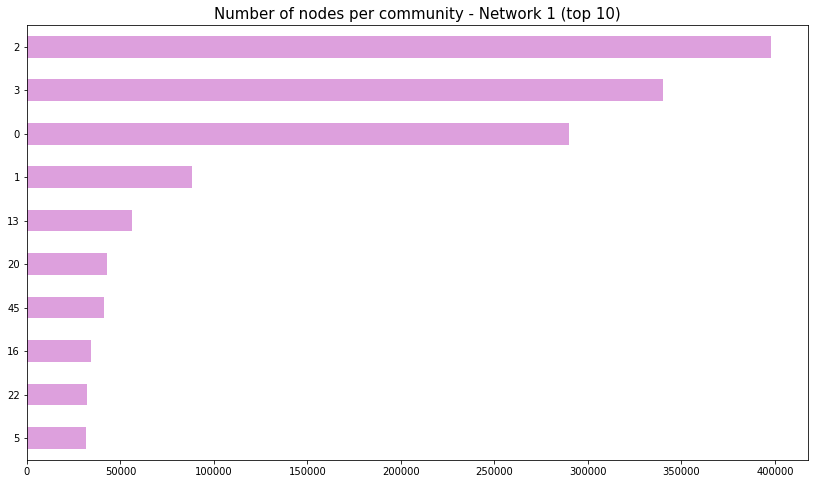

In [64]:
communities = []
for i in louvain_1:
    communities.append(louvain_1.get(i))
comm = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = comm[:10].plot(kind='barh', color='plum') #orange #lightseagreen
ax.set_title('Number of nodes per community - Network 1 (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

Totale degli utenti che retweettano i Bad Dozen in questa network: 26709, il 1.48%
17.39% su chi retweetta i Bad Dozen


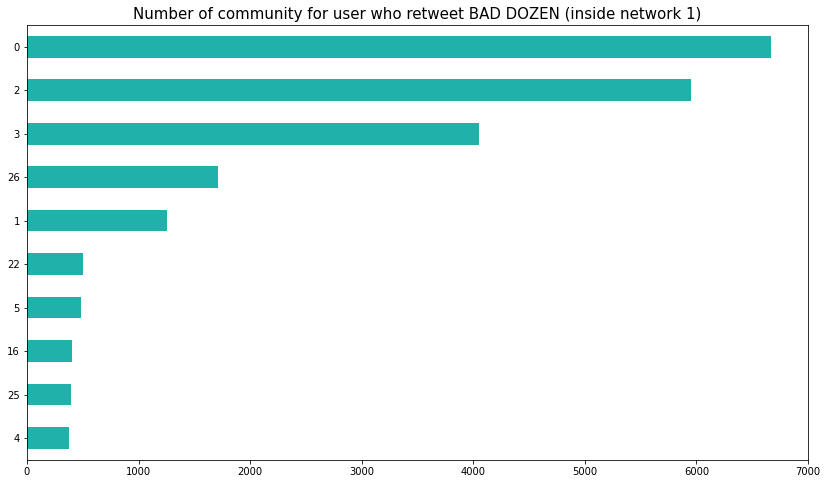

In [65]:
val = rt_community(ccdh_rt_flt_1, louvain_1)
print(f"Totale degli utenti che retweettano i Bad Dozen in questa network: {val.sum()}, il {round(val.sum()/comm.sum()*100,2)}%")
print(f"{round(val.sum()/len(ccdh_rt)*100,2)}% su chi retweetta i Bad Dozen")
plot_hist(val, "Number of community for user who retweet BAD DOZEN (inside network 1)")

# print(f"Lunghezza della community più grande: {val[0]} nodi su {comm[3]} della network ({round(val[0]/comm[3],4)*100}%)")
# print(f"La community 1-0 contiene il {round(val[0] / sum(val),4)*100}% degli utenti presenti nella network")
# print(f"La network contiene {sum(val)} utenti che retwettano i BAD DOZEN su un totale di {len(ccdh_rt)} ({round(sum(val)/len(ccdh_rt),2)*100}%)")


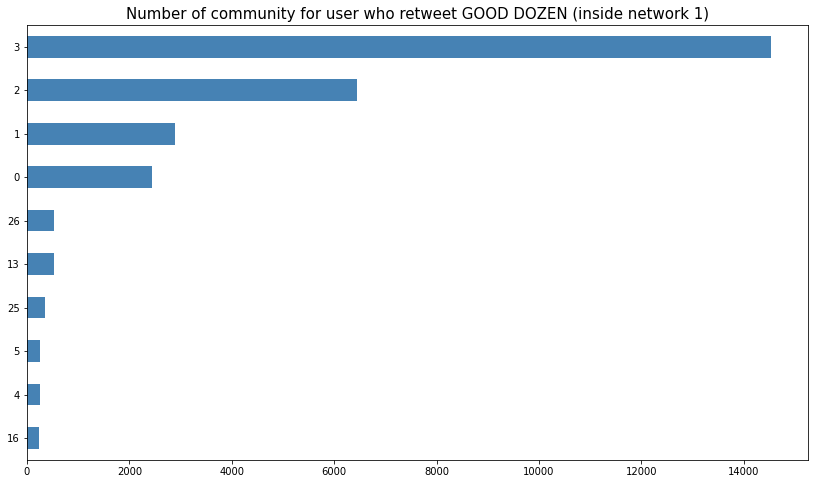

Utenti che retweettano i Good Dozen : 32212, il 1.79% sulla network
54.21% sul totale degli utenti che retweettano i Good Dozen


In [46]:
val = rt_community(good_rt_flt_1, louvain_1)
print(f"Utenti che retweettano i Good Dozen : {val.sum()}, il {round(val.sum()/comm.sum()*100,2)}% sulla network")
print(f"{round(val.sum()/len(good_rt)*100,2)}% sul totale degli utenti che retweettano i Good Dozen")
plot_hist(val, "Number of community for user who retweet GOOD DOZEN (inside network 1)", "steelblue")


### Network Community 2
<p>
    
    News meno politiche, più concentrato sulle notizie (maggiori testate al mondo come CNN international,
    BBC world, Time ecc)
    
</p>
<a id="comm_2"/>

In [48]:
path_inside = path + "/nt_2/"
louvain_path = glob.glob(path_inside + "louvain*.json")[0]
louvain_2 = read_from_json(louvain_path)
ccdh_rt_flt_2 = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain_2])]
good_rt_flt_2 = good_rt[good_rt.user_screen_name.isin([x for x in louvain_2])]

Time:  2.483130799999799


#### Info
<a id="info_2">

<p>
    
    Type: Graph
    Number of nodes: 1729679
    Number of edges: 6475881
    Average degree:   7.4880
    
</p>

#### Louvain
<a id="louvain_2"/>

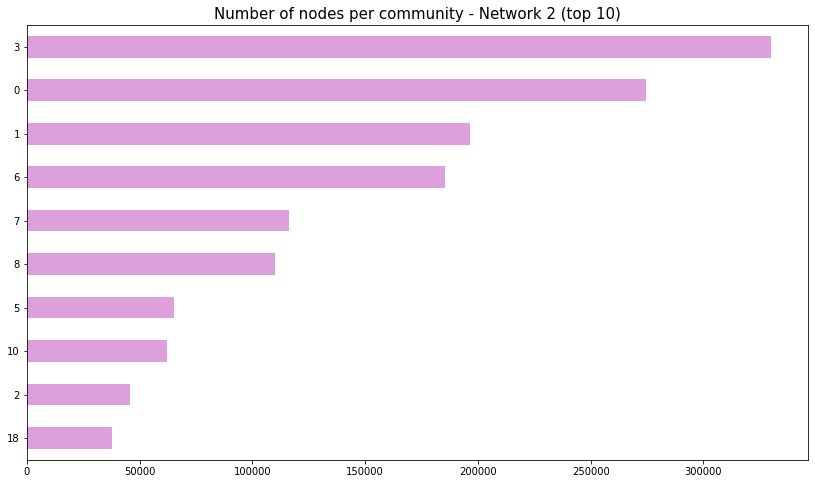

In [62]:
communities = []
for i in louvain_2:
    communities.append(louvain_2.get(i))
comm = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = comm[:10].plot(kind='barh', color='plum') #orange #lightseagreen
ax.set_title('Number of nodes per community - Network 2 (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

Totale degli utenti che retweettano i Bad Dozen in questa network: 60673, il 3.37%
39.51% su chi retweetta i Bad Dozen


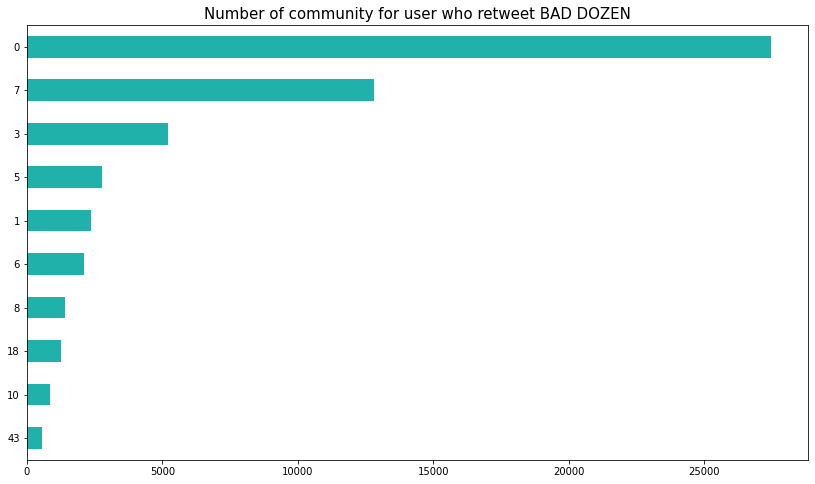

In [60]:
val = rt_community(ccdh_rt_flt_2, louvain_2)
print(f"Totale degli utenti che retweettano i Bad Dozen in questa network: {val.sum()}, il {round(val.sum()/comm.sum()*100,2)}%")
print(f"{round(val.sum()/len(ccdh_rt)*100,2)}% su chi retweetta i Bad Dozen")
# print(f"Lunghezza della community più grande: {val[1]} nodi su {comm[4]} della network ({round(val[1]/comm[4],4)*100}%)")
# print(f"La community 2-1 contiene il {round(val[1] / sum(val),4)*100}% degli utenti presenti nella network")
# print(f"La network contiene {sum(val)} utenti che retwettano i BAD DOZEN su un totale di {len(ccdh_rt)} ({round(sum(val)/len(ccdh_rt),2)*100}%)")
plot_hist(val, "Number of community for user who retweet BAD DOZEN")

Utenti che retweettano i Good Dozen : 23097, il 1.34% sulla network
38.87% sul totale degli utenti che retweettano i Good Dozen


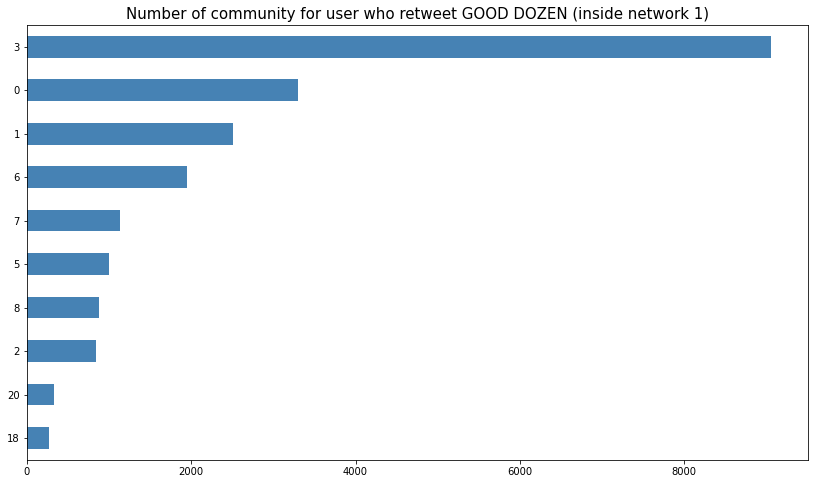

In [63]:
val = rt_community(good_rt_flt_2, louvain_2)
print(f"Utenti che retweettano i Good Dozen : {val.sum()}, il {round(val.sum()/comm.sum()*100,2)}% sulla network")
print(f"{round(val.sum()/len(good_rt)*100,2)}% sul totale degli utenti che retweettano i Good Dozen")
plot_hist(val, "Number of community for user who retweet GOOD DOZEN (inside network 1)", "steelblue")

### Network Community 5
<a id="comm_5"/>

In [155]:
path_inside = path + "/network_5/"
louvain_path = glob.glob(path_inside + "louvain*.json")[0]
louvain_5 = read_from_json(louvain_path)
ccdh_rt_flt_5 = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain_5])]
good_rt_flt_5 = good_rt[good_rt.user_screen_name.isin([x for x in louvain_5])]

#### Info
<a id="info_5"/>

<p>
    
    Name: 
    Type: DiGraph
    Number of nodes: 1736723
    Number of edges: 5328319
    Average in degree:   3.0680
    Average out degree:   3.0680
        
</p>

#### Louvain
<a id="louvain_5"/>

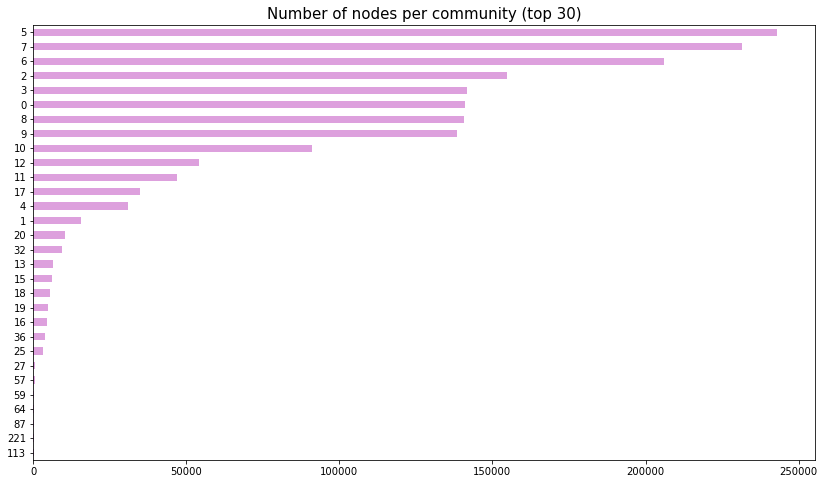

In [156]:
communities = []
for i in louvain_5:
    communities.append(louvain_5.get(i))
comm = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = comm[:30].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

Lunghezza della community più grande: 1135 nodi su 260 della network (436.54%)
La community 5-9 contiene il 17.82% degli utenti presenti nella network
La network contiene 6370 utenti che retwettano i BAD DOZEN su un totale di 153552 (4.0%)


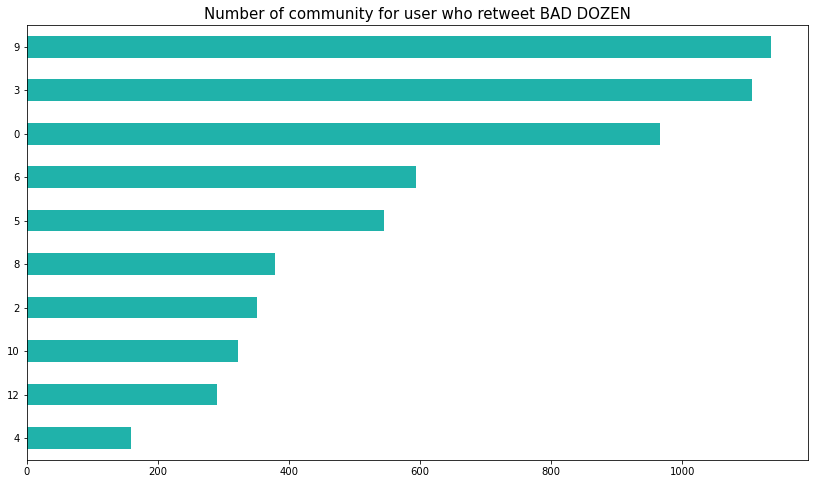

In [166]:
val = rt_community(ccdh_rt_flt_5, louvain_5)
print(f"Lunghezza della community più grande: {val[9]} nodi su {comm[5]} della network ({round(val[9]/comm[5],4)*100}%)")
print(f"La community 5-9 contiene il {round(val[9] / sum(val),4)*100}% degli utenti presenti nella network")
print(f"La network contiene {sum(val)} utenti che retwettano i BAD DOZEN su un totale di {len(ccdh_rt)} ({round(sum(val)/len(ccdh_rt),2)*100}%)")
plot_hist(val, "Number of community for user who retweet BAD DOZEN")

Lunghezza della community più grande: 1068 nodi su 243051 della network (0.44%)
La community 5-0 contiene il 25.080000000000002% degli utenti presenti nella network
La network contiene 4259 utenti che retwettano i GOOD DOZEN su un totale di 59425 (7.000000000000001%)


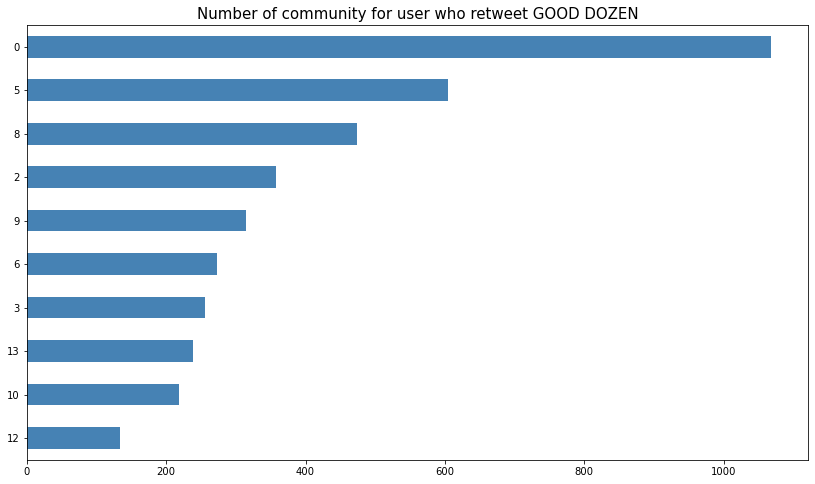

In [158]:
val = rt_community(good_rt_flt_5, louvain_5)
print(f"Lunghezza della community più grande: {val[0]} nodi su {comm[5]} della network ({round(val[0]/comm[5],4)*100}%)")
print(f"La community 5-0 contiene il {round(val[0] / sum(val),4)*100}% degli utenti presenti nella network")
print(f"La network contiene {sum(val)} utenti che retwettano i GOOD DOZEN su un totale di {len(good_rt)} ({round(sum(val)/len(good_rt),2)*100}%)")
plot_hist(val, "Number of community for user who retweet GOOD DOZEN", "steelblue")

### Network Community 19
<a id="comm_19"/>


In [159]:
nt_19 = pd.read_csv(path + "nt_19.csv", low_memory=False, lineterminator='\n')
out_19 = network_general(nt_19)
louvain_19 = network_louvain(nt_19)
ccdh_rt_flt_19 = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain_19["best_part"]])]
good_rt_flt_19 = good_rt[good_rt.user_screen_name.isin([x for x in louvain_19["best_part"]])]

#### Info
<a id="info_19"/>

In [56]:
print(out_19["info"])

Name: 
Type: DiGraph
Number of nodes: 75977
Number of edges: 102045
Average in degree:   1.3431
Average out degree:   1.3431


#### Louvain
<a id="louvain_19"/>

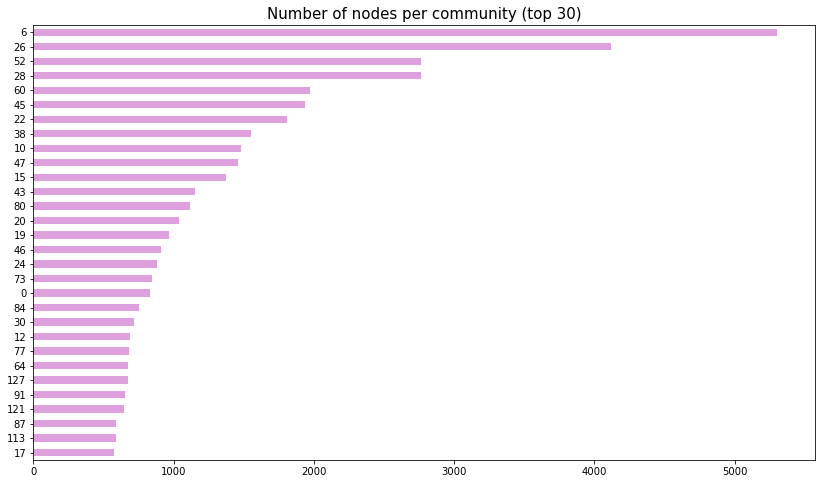

In [160]:
communities = []
for i in louvain_19["best_part"]:
    communities.append(louvain_19["best_part"].get(i))
comm = pd.Series(communities).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = comm[:30].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

Lunghezza della community più grande: 115 nodi su 5305 della network (2.17%)
La community 19-6 contiene il 11.450000000000001% degli utenti presenti nella network
La network contiene 1004 utenti che retwettano i BAD DOZEN su un totale di 153552 (1.0%)


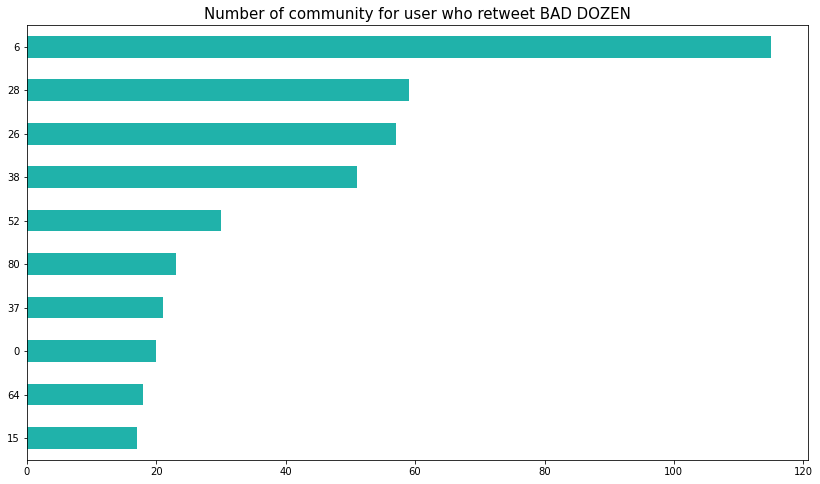

In [165]:
val = rt_community(ccdh_rt_flt_19, louvain_19["best_part"])
print(f"Lunghezza della community più grande: {val[6]} nodi su {comm[6]} della network ({round(val[6]/comm[6],4)*100}%)")
print(f"La community 19-6 contiene il {round(val[6] / sum(val),4)*100}% degli utenti presenti nella network")
print(f"La network contiene {sum(val)} utenti che retwettano i BAD DOZEN su un totale di {len(ccdh_rt)} ({round(sum(val)/len(ccdh_rt),2)*100}%)")
plot_hist(val, "Number of community for user who retweet BAD DOZEN")

Lunghezza della community più grande: 126 nodi su 5305 della network (2.3800000000000003%)
La community 19-6 contiene il 10.26% degli utenti presenti nella network
La network contiene 1228 utenti che retwettano i GOOD DOZEN su un totale di 59425 (2.0%)


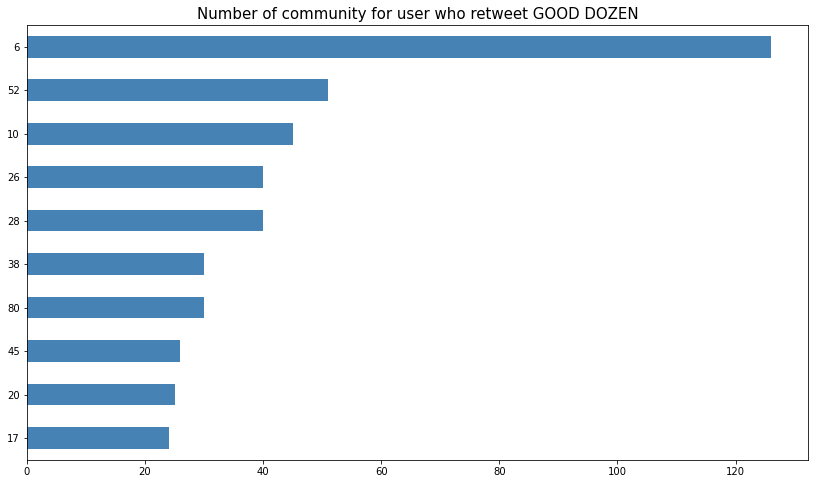

In [164]:
val = rt_community(good_rt_flt_19, louvain_19["best_part"])
print(f"Lunghezza della community più grande: {val[6]} nodi su {comm[6]} della network ({round(val[6]/comm[6],4)*100}%)")
print(f"La community 19-6 contiene il {round(val[6] / sum(val),4)*100}% degli utenti presenti nella network")
print(f"La network contiene {sum(val)} utenti che retwettano i GOOD DOZEN su un totale di {len(good_rt)} ({round(sum(val)/len(good_rt),2)*100}%)")
plot_hist(val, "Number of community for user who retweet GOOD DOZEN", "steelblue")